# Выявление закономерностей, определяющие успешность игры в интернет-магазине «Стримчик»

**Цели исследования:**  
- Выявить закономерности, определяющие успешность компьютерных игр.  
- Спрогнозировать потенциально популярные игры для планирования рекламных кампаний на 2017 год.  
- Отработать принципы работы с данными на основе исторических продаж, оценок пользователей и экспертов, жанров и платформ.

**Ход исследования:**

1. Открыть файл с данными и изучить общую информацию
2. Подготовить данные для анализа
3. Провести исследовательский анализ данных
4. Составить портрет пользователя каждого региона
5. Проверить гипотезы
6. Написать общий вывод

**Импорт необходимых библиотек**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats as st
import seaborn as sns

**Шаг 1.** Открытие файла с данными и изучение общей информации

In [2]:
games_df = pd.read_csv('/datasets/games.csv')

In [3]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games_df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
games_df.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [6]:
games_df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
games_df.duplicated().sum()

0

**ВЫВОД:**

В ходе изучения общей информации, было выявлено:
- В некоторых столбцах не соответствующий тип данных;
- Названия столбцов не приведены к одному стилю;
- В датафрейме есть пропуски, дубликаты отсутствуют.

---

**Шаг 2.** Подготовка данных

Приведение названий столбцов к единому стилю

In [8]:
games_df.columns = games_df.columns.str.lower()

In [9]:
games_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


---

Проверка содержимого столбцов 'rating' и 'platform', приведение к единому стилю

In [10]:
games_df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [11]:
games_df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [12]:
games_df['platform'] = games_df['platform'].str.upper()

Приведение к нижнему регистру содержимое столбцов 'name' и 'genre'

In [13]:
games_df[['name', 'genre']] = games_df[['name', 'genre']].apply(lambda x: x.str.lower())

---

Пропущенных значений в столбцах 'name' и 'genre' всего 2, поэтому их удаление не исказит представление о всем датафрейме

In [14]:
games_df[(games_df['name'].isna() & games_df['genre'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [15]:
games_df = games_df.dropna(subset=['name'])

Заполнение пропусков в столбце 'year_of_release'

In [16]:
games_df['year_of_release'].isna().sum()

269

Группировка игр по группам с одинаковым названием и заполнение пропусков внутри групп медианным значением. Если пропуски еще остануться, то они удаляются

In [17]:
# games_df['year_of_release'] = games_df['year_of_release'].fillna(games_df.groupby('name')['year_of_release'].transform('median'))
# games_df = games_df.dropna(subset=['year_of_release'])

In [18]:
games_df = games_df.dropna(subset=['year_of_release'])

Заполнение пропусков в столбце 'critic_score'

Пропущенные данные в столбце "оценка критиков" нельзя заменить медианным или средним значением, поэтому они заменяются на "-1", что будет означать "пропуск"

In [19]:
games_df['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

In [20]:
games_df['critic_score'] = games_df['critic_score'].fillna(-1)

Заполнение пропусков в столбце 'user_score'

In [21]:
games_df['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Заменим значения 'tbd' на NaN, после этого заменим все значения NaN на -1, по принципу столбца 'critic_score'

In [22]:
games_df['user_score'] = games_df['user_score'].replace('tbd', np.nan)

In [23]:
games_df['user_score'] = games_df['user_score'].fillna(-1)

Заполнение пропусков в столбце 'rating'. Замена NaN на 'unknown', что будет означать остутствие рейтинга

In [24]:
games_df['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

In [25]:
games_df['rating'] = games_df['rating'].fillna('unknown')

---

Приведение столбца 'year_of_release' к целочисленному типу данных

In [26]:
games_df['year_of_release'] = pd.to_datetime(games_df['year_of_release'], format='%Y').dt.year

In [27]:
games_df['year_of_release'] = games_df['year_of_release'].astype('int')

Приведение столбца 'critic_score' к целочисленному типу данных

In [28]:
games_df['critic_score'] = games_df['critic_score'].astype('int')

Приведение столбца 'user_score' к типу данных число с плавающей точкой

In [29]:
games_df['user_score'] = games_df['user_score'].astype('float')

Добавим столбец 'total_sales' с общим показателем продаж во всех странах

In [30]:
games_df['total_sales'] = games_df['na_sales'] + games_df['eu_sales'] + games_df['jp_sales'] + games_df['other_sales']

---

Проверка

In [31]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB


In [32]:
games_df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

In [33]:
games_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,WII,2006,sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,super mario bros.,NES,1985,platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,mario kart wii,WII,2008,racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,wii sports resort,WII,2009,sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38


In [34]:
games_df.tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16710,samurai warriors: sanada maru,PS3,2016,action,0.00,0.00,0.01,0.0,-1,-1.0,unknown,0.01
16711,lma manager 2007,X360,2006,sports,0.00,0.01,0.00,0.0,-1,-1.0,unknown,0.01
16712,haitaka no psychedelica,PSV,2016,adventure,0.00,0.00,0.01,0.0,-1,-1.0,unknown,0.01
16713,spirits & spells,GBA,2003,platform,0.01,0.00,0.00,0.0,-1,-1.0,unknown,0.01
16714,winning post 8 2016,PSV,2016,simulation,0.00,0.00,0.01,0.0,-1,-1.0,unknown,0.01


In [35]:
games_df[games_df.duplicated(['name', 'platform', 'year_of_release'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,madden nfl 13,PS3,2012,sports,2.11,0.22,0.0,0.23,83,5.5,E,2.56
16230,madden nfl 13,PS3,2012,sports,0.00,0.01,0.0,0.00,83,5.5,E,0.01


Судя по количеству продаж, вторая строка - случайность в нашем датафрейме. Оставим только первую строку, вторую удалим

In [36]:
games_df = games_df.drop_duplicates(['name', 'platform', 'year_of_release'], keep='first')

Проверка:

In [37]:
games_df[games_df.duplicated(['name', 'platform', 'year_of_release'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


In [38]:
# games_df.loc[16230]

**ВЫВОД:**

В ходе подготовки данных, было выполнено:

- Названия столбцов приведены к единому стилю - нижнему регистру;
- Содержимое столбцов 'rating' и 'platform', приведение к единому стилю - верхнему регистру;
- Содержимое столбцов 'name' и 'genre', приведение к единому стилю - нижнему регистру;


- Строки с пропущенным значениями в столбцах 'name' и 'genre' удалены;
- Содержимое в столбце 'year_of_release' сгруппировано по названию, пустые значения заменены на медианные значения групп;
- Пустые значения в столбцах 'critic_score' и  'user_score' заменены на '-1', в 'rating' - на '0';


- Столбец 'year_of_release' приведен к целочисленному типу данных;
- Столбец 'critic_score' приведен к целочисленному типу данных;
- Столбец 'user_score' приведен к числовому типу данных с плавающей точкой;


- Выполнена проверка.

---

**Шаг 3.** Исследовательский анализ данных

**3.1** Сколько игр выпускалось в разные годы

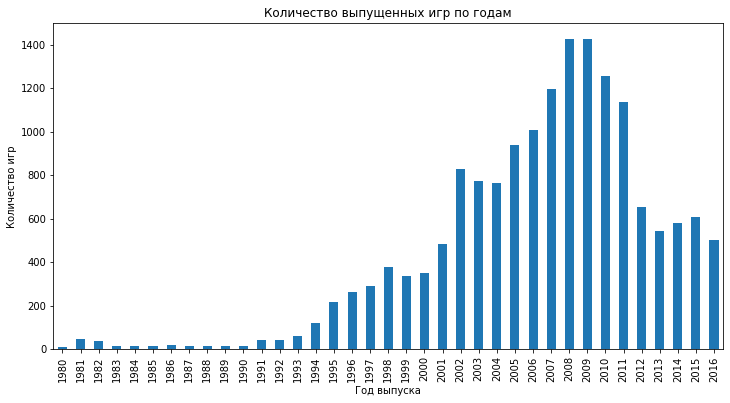

In [39]:
plt.figure(figsize=(12, 6))
games_df['year_of_release'].value_counts().sort_index().plot(kind='bar')
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

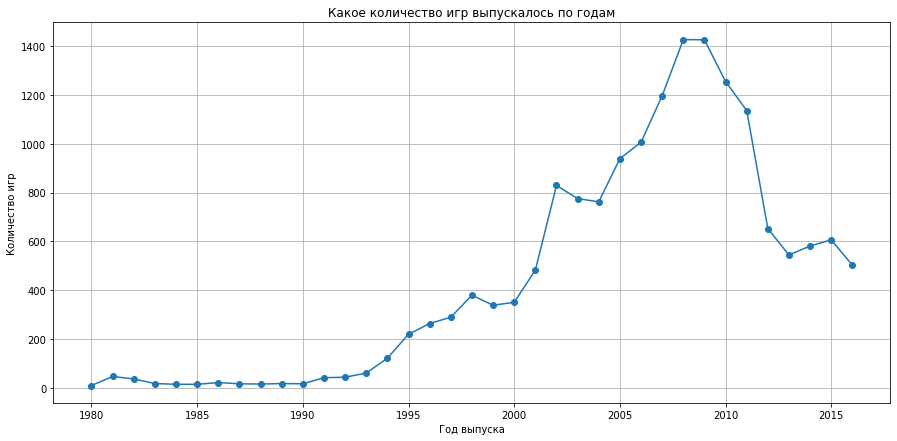

In [40]:
plt.figure(figsize=(15, 7))
plt.plot(games_df.groupby('year_of_release')['name'].count(), 'o-')
plt.title('Какое количество игр выпускалось по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.grid(True)
plt.show();

In [41]:
year_min_games = games_df.groupby('year_of_release')['name'].count().idxmin()
year_max_games = games_df.groupby('year_of_release')['name'].count().idxmax()

year_1980_games = games_df[games_df['year_of_release'] == 1980]['name'].count()
year_2008_games = games_df.groupby('year_of_release')['name'].count().max()

In [42]:
print(f'{year_min_games}: {year_1980_games}')
print(f'{year_max_games}: {year_2008_games}')

1980: 9
2008: 1427


In [43]:
print(((year_2008_games - year_1980_games) / year_1980_games * 100).round(), '%')

15756.0 %


**Вывод:**

Интервал с пиковыми значениями роста количества выпускаемых игр приходится на 1990 - 2008 годы. Рост составил 1432 игры, или почти 16 тысяч процентов. После 2008 года начинается спад.

---

**3.2** Как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

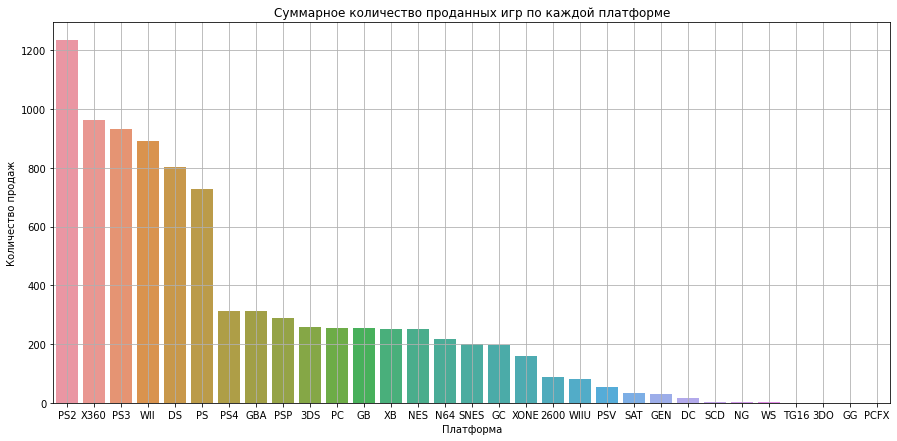

In [44]:
all_sales_by_platform = games_df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(15, 7))
sns.barplot(x=all_sales_by_platform.index, y=all_sales_by_platform['total_sales'])
plt.title('Суммарное количество проданных игр по каждой платформе')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.grid(True)
plt.show();

Вывод: на графике явно выделяются 6 платформ с наибольшими суммарными продажами: "PS2", "X360", "PS3", "WII", "DS", "PS"

Распределение по годам платформ с наибольшими суммарными продажами. Жизненный цикл платформ

In [45]:
top_platforms = all_sales_by_platform.head(6).index

In [46]:
# Создаем датафрейм с топовыми платформами и считаем суммарные продажи
top_platforms_df = games_df[games_df['platform'].isin(top_platforms)]
sales_per_year_platform = top_platforms_df.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

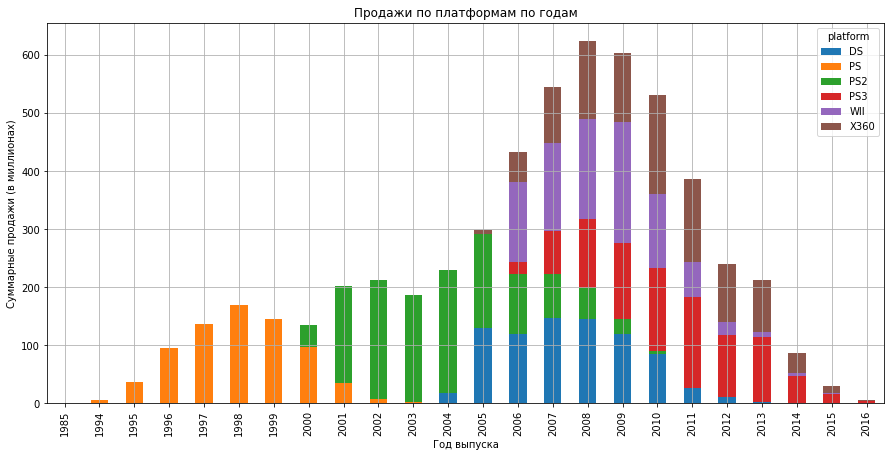

In [47]:
sales_per_year_platform.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (в миллионах)')
plt.title('Продажи по платформам по годам')
plt.grid(True)
plt.show()

In [48]:
# Сгруппируем данные по платформам и найдем минимальный и максимальный год выпуска для каждой платформы
# Вычислим продолжительность жизни платформ
platform_lifetime_df = games_df.groupby('platform')['year_of_release'].agg(['min', 'max'])
# platform_lifetime['lifetime'] = platform_lifetime['max'] - platform_lifetime['min'] + 1

In [49]:
# platform_lifetime['lifetime'].mean()

In [50]:
platform_lifetime = []
for platform in top_platforms:
    life_time = games_df.query('(platform == @platform)').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').count()
    platform_lifetime.append(life_time)
mean_platform_lifetime = int(np.mean(platform_lifetime))
print(f'Средний жизненный цикл платформы - {mean_platform_lifetime} лет')

Средний жизненный цикл платформы - 11 лет


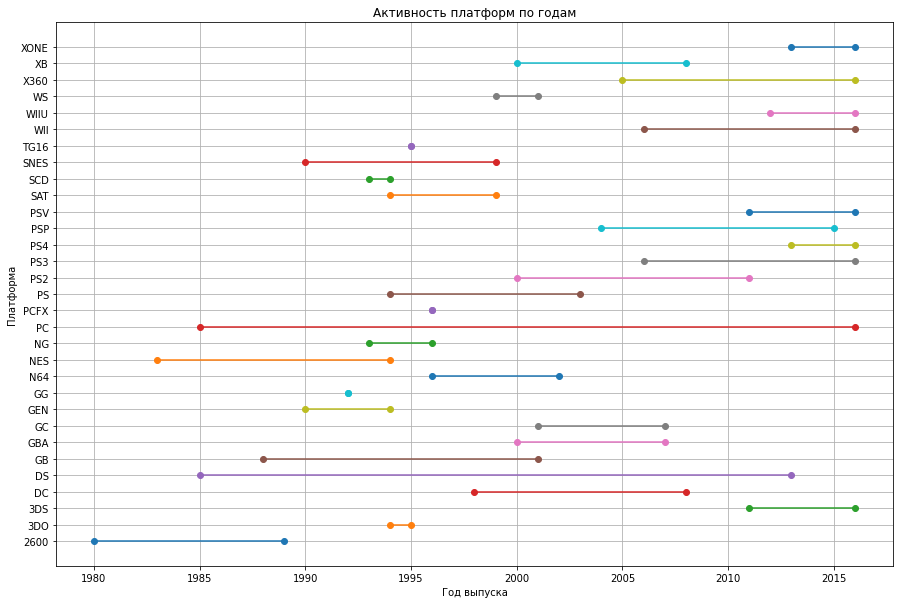

In [51]:
plt.figure(figsize=(15, 10))
for platform in platform_lifetime_df.index:
    plt.plot([platform_lifetime_df.loc[platform, 'min'], platform_lifetime_df.loc[platform, 'max']], [platform, platform], marker='o')

plt.xlabel('Год выпуска')
plt.ylabel('Платформа')
plt.title('Активность платформ по годам')
plt.grid(True)
plt.show()

**Вывод:**

- Количество выпускаемых игр значительно изменялось по годам, и для долгосрочного анализа важны данные за все периоды.

- Продажи по платформам также изменялись по годам, и мы выявили топ-6 платформ с наибольшими суммарными продажами.

- Определили характерный срок появления и исчезновения платформ - платформы обычно активны в течение 11 лет.

---

**3.3** Выберем данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

In [52]:
# Данные за акутальный период 2014 - 2016
# relevant_df = games_df.query('year_of_release >= 2014')
relevant_df = games_df.query('year_of_release >= 2014').copy()

In [53]:
# Группируем акутальный данные по годам выпуска и суммируем продажи
sales_per_year = relevant_df.groupby('year_of_release')['total_sales'].sum()

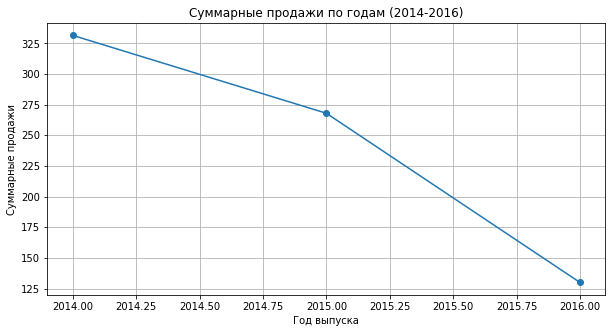

In [54]:
# Построим график суммарных продаж по годам для актуального периода
plt.figure(figsize=(10, 5))
plt.plot(sales_per_year.index, sales_per_year.values, marker='o')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.title('Суммарные продажи по годам (2014-2016)')
plt.grid(True)
plt.show();

**Вывод:**

Актуальные данные выбраны за период с 2014 по 2016 годы, они помогут построить прогноз на 2017 год.

---

**3.5** Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [55]:
# Сгруппируем данные по платформам и посчитаем суммарные продажи
platform_sales = relevant_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

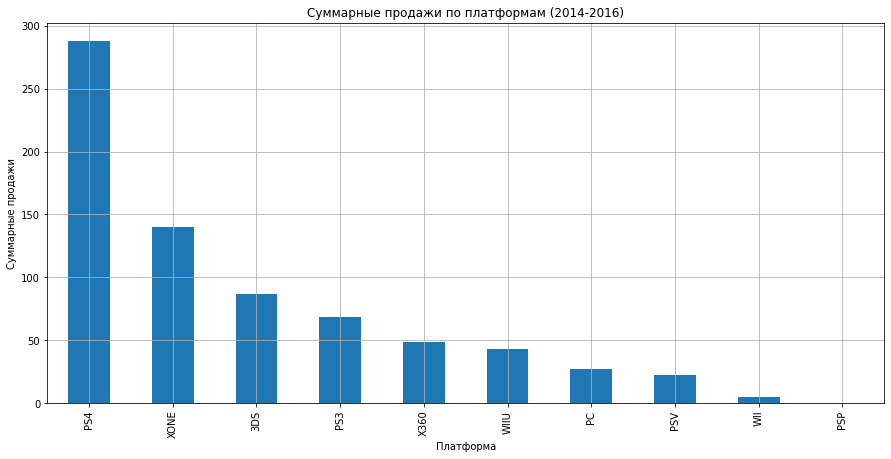

In [56]:
# Построим график продаж по платформам
plt.figure(figsize=(15, 7))
platform_sales.plot(kind='bar')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.title('Суммарные продажи по платформам (2014-2016)')
plt.grid(True)
plt.show();

In [57]:
# Определим платформы с ростом и падением продаж по годам
sales_per_year_platform = relevant_df.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

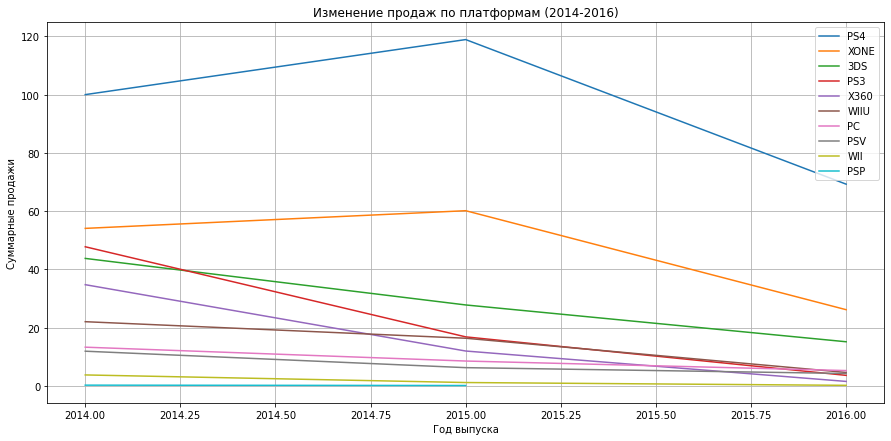

In [58]:
# Построим график изменения продаж по платформам
plt.figure(figsize=(15, 7))
for platform in platform_sales.index:
    plt.plot(sales_per_year_platform.index, sales_per_year_platform[platform], label=platform)

plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.title('Изменение продаж по платформам (2014-2016)')
plt.legend()
plt.grid(True)
plt.show();

**Вывод:**

- Определили платформы с наибольшими суммарными продажами;

- Выявили платформы, продажи которых растут;

- Выявили платформы, продажи которых падают.

---

**3.6** Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

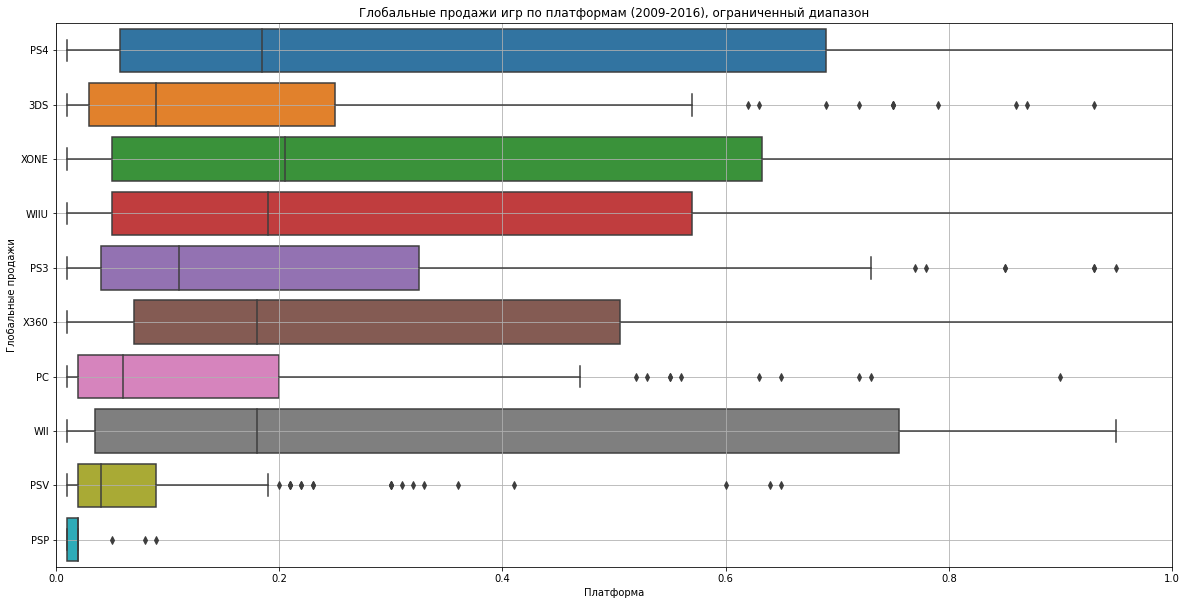

In [60]:
# Вторая визуализация - ограниченный диапазон значений по оси x
plt.figure(figsize=(20, 10))
sns.boxplot(x='total_sales', y='platform', data=relevant_df)
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')
plt.title('Глобальные продажи игр по платформам (2009-2016), ограниченный диапазон')
plt.xlim(0, 1)
plt.grid(True)
plt.show()

**Вывод:**

- Из графика суммарных продаж видно, какие платформы лидируют по продажам;

- Изменение продаж по платформам: График изменения продаж по годам позволяет увидеть тенденции. Например, если у платформы PS3 продажи снижаются к концу периода, то у PS4 они могут расти.

- График «ящик с усами» показывает распределение глобальных продаж игр по платформам. Мы можем видеть медиану, квартильные диапазоны и выбросы. Платформы с более высокими медианными значениями и меньшим разбросом данных могут быть более стабильными и прибыльными.

---

**3.7** Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [65]:
platform_x360_df = relevant_df[(relevant_df['platform'] == 'X360') & (relevant_df['critic_score'] != -1) & (relevant_df['user_score'] != -1)]

In [100]:
# код ревьюера

print(relevant_df[(relevant_df['platform'] == 'X360') & (relevant_df['critic_score'] >= 0)].shape[0])
print(relevant_df[(relevant_df['platform'] == 'X360') & (relevant_df['user_score'] >= 0)].shape[0])
print(relevant_df[(relevant_df['platform'] == 'X360') & (relevant_df['critic_score'] >= 0) & (relevant_df['user_score'] >= 0)].shape[0])

26
83
26


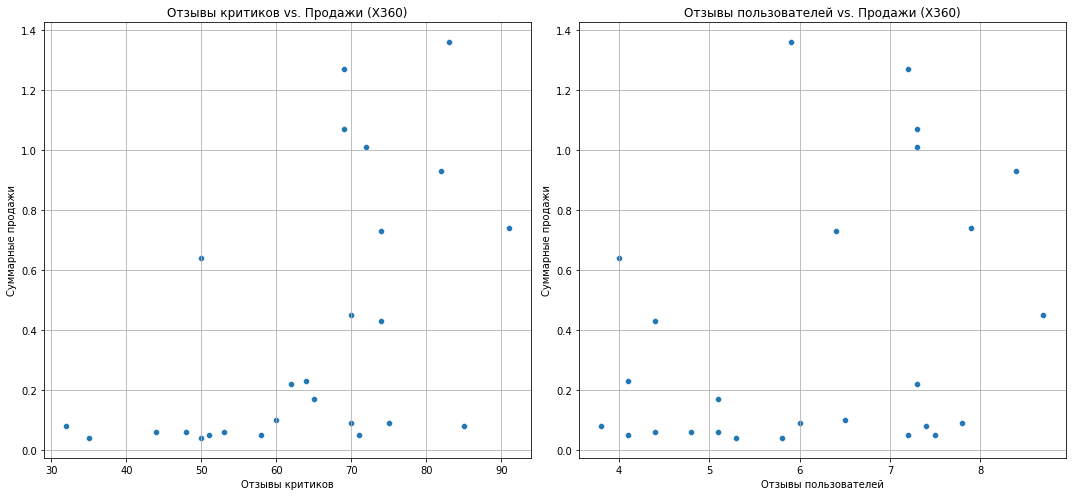

In [66]:
# Построим диаграммы рассеяния для отзывов пользователей и критиков
plt.figure(figsize=(15, 7))

# Отзывы критиков
plt.subplot(1, 2, 1)
sns.scatterplot(x='critic_score', y='total_sales', data=platform_x360_df)
plt.xlabel('Отзывы критиков')
plt.ylabel('Суммарные продажи')
plt.title('Отзывы критиков vs. Продажи (X360)')
plt.grid(True)

# Отзывы пользователей
plt.subplot(1, 2, 2)
sns.scatterplot(x='user_score', y='total_sales', data=platform_x360_df)
plt.xlabel('Отзывы пользователей')
plt.ylabel('Суммарные продажи')
plt.title('Отзывы пользователей vs. Продажи (X360)')
plt.grid(True)

plt.tight_layout()
plt.show();

In [67]:
# Вычислим корреляцию между отзывами и продажами
critic_correlation = platform_x360_df['critic_score'].corr(platform_x360_df['total_sales'])
user_correlation = platform_x360_df['user_score'].corr(platform_x360_df['total_sales'])

print(f'Корреляция между отзывами критиков и продажами (X360): {critic_correlation:.3f}')
print(f'Корреляция между отзывами пользователей и продажами (X360): {user_correlation:.3f}')

Корреляция между отзывами критиков и продажами (X360): 0.526
Корреляция между отзывами пользователей и продажами (X360): 0.337


**Вывод:**

Для платформы X360 наблюдается умеренная положительная корреляция между отзывами критиков и суммарными продажами игр, коэффициент корреляции составляет **0.526**. Это указывает на то, что высокие оценки критиков оказывают заметное влияние на увеличение продаж игр.  

Отзывы пользователей также демонстрируют положительную корреляцию с продажами, но менее выраженную, чем у критиков: коэффициент корреляции составляет **0.337**. Это говорит о том, что оценки пользователей влияют на продажи, но слабее, чем оценки критиков.  

Следовательно, можно сделать вывод, что для платформы X360 **отзывы критиков оказывают большее влияние на продажи игр**, чем отзывы пользователей, однако оба показателя имеют значимую положительную связь с продажами.

---

---

**3.8** Соотнесите выводы с продажами игр на других платформах.

Возьмем для сравнения продажи игр на следующих платформах: PS3, WII, PS4

*PS3*

In [70]:
# Отфильтруем данные для платформы PS3
platform_ps3_df = relevant_df[relevant_df['platform'] == 'PS3']

In [71]:
# Убираем заглушки из оценок критиков и пользователей
platform_ps3_df = platform_ps3_df[(platform_ps3_df['critic_score'] != -1) & (platform_ps3_df['user_score'] != -1)]

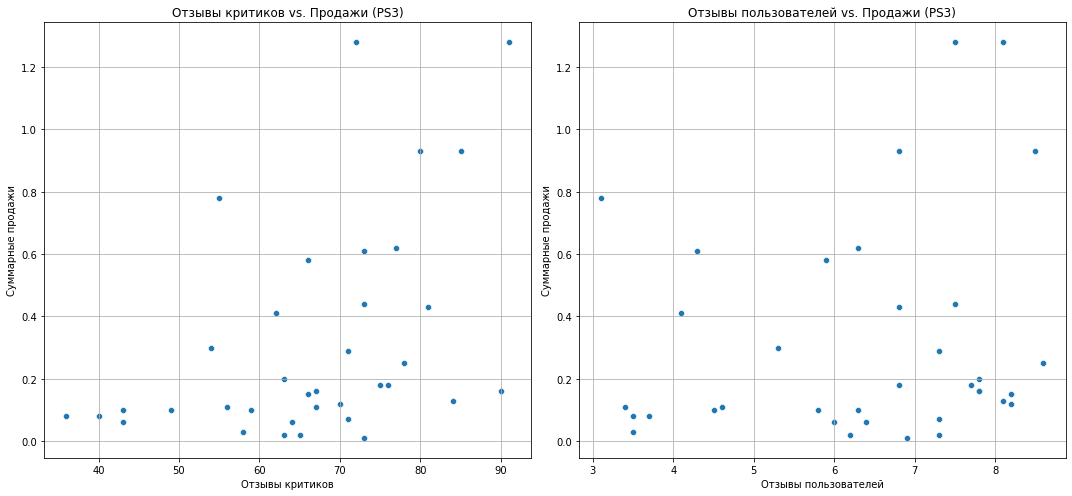

In [72]:
# Построим диаграммы рассеяния для отзывов пользователей и критиков
plt.figure(figsize=(15, 7))

# Отзывы критиков
plt.subplot(1, 2, 1)
sns.scatterplot(x='critic_score', y='total_sales', data=platform_ps3_df)
plt.xlabel('Отзывы критиков')
plt.ylabel('Суммарные продажи')
plt.title('Отзывы критиков vs. Продажи (PS3)')
plt.grid(True)

# Отзывы пользователей
plt.subplot(1, 2, 2)
sns.scatterplot(x='user_score', y='total_sales', data=platform_ps3_df)
plt.xlabel('Отзывы пользователей')
plt.ylabel('Суммарные продажи')
plt.title('Отзывы пользователей vs. Продажи (PS3)')
plt.grid(True)

plt.tight_layout()
plt.show();

In [73]:
# Вычислим корреляцию между отзывами и продажами
critic_correlation_ps3 = platform_ps3_df['critic_score'].corr(platform_ps3_df['total_sales'])
user_correlation_ps3 = platform_ps3_df['user_score'].corr(platform_ps3_df['total_sales'])

print(f'Корреляция между отзывами критиков и продажами (PS3): {critic_correlation_ps3:.2f}')
print(f'Корреляция между отзывами пользователей и продажами (PS3): {user_correlation_ps3:.2f}')

Корреляция между отзывами критиков и продажами (PS3): 0.45
Корреляция между отзывами пользователей и продажами (PS3): 0.16


*WII*

In [74]:
# Отфильтруем данные для платформы WII
platform_wii_df = relevant_df[relevant_df['platform'] == 'WII']

In [75]:
platform_wii_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
850,just dance 2015,WII,2014,misc,0.99,0.85,0.0,0.17,-1,8.4,E10+,2.01
2179,just dance 2016,WII,2015,misc,0.41,0.46,0.0,0.08,-1,-1.0,E10+,0.95
2180,skylanders: trap team,WII,2014,action,0.41,0.46,0.0,0.08,-1,-1.0,E10+,0.95
3611,fifa 15,WII,2014,sports,0.15,0.37,0.0,0.04,-1,4.3,E,0.56
7991,how to train your dragon 2,WII,2014,adventure,0.04,0.13,0.0,0.01,-1,-1.0,E10+,0.18
8009,just dance 2017,WII,2016,misc,0.06,0.11,0.0,0.01,-1,-1.0,E10+,0.18
8941,skylanders: superchargers,WII,2015,action,0.02,0.12,0.0,0.01,-1,-1.0,unknown,0.15
13570,disney planes fire & rescue,WII,2014,action,0.00,0.04,0.0,0.00,-1,-1.0,unknown,0.04
14682,barbie and her sisters puppy rescue,WII,2015,action,0.00,0.03,0.0,0.00,-1,-1.0,E,0.03
16144,penguins of madagascar,WII,2014,action,0.00,0.01,0.0,0.00,-1,-1.0,E,0.01


Нет ни одной записи с платформой 'WII' с известным значением в столбце 'critic_score' 

In [76]:
# Убираем заглушки из оценок критиков и пользователей
platform_wii_df = platform_wii_df[(platform_wii_df['critic_score'] != -1) & (platform_wii_df['user_score'] != -1)]

In [77]:
platform_wii_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


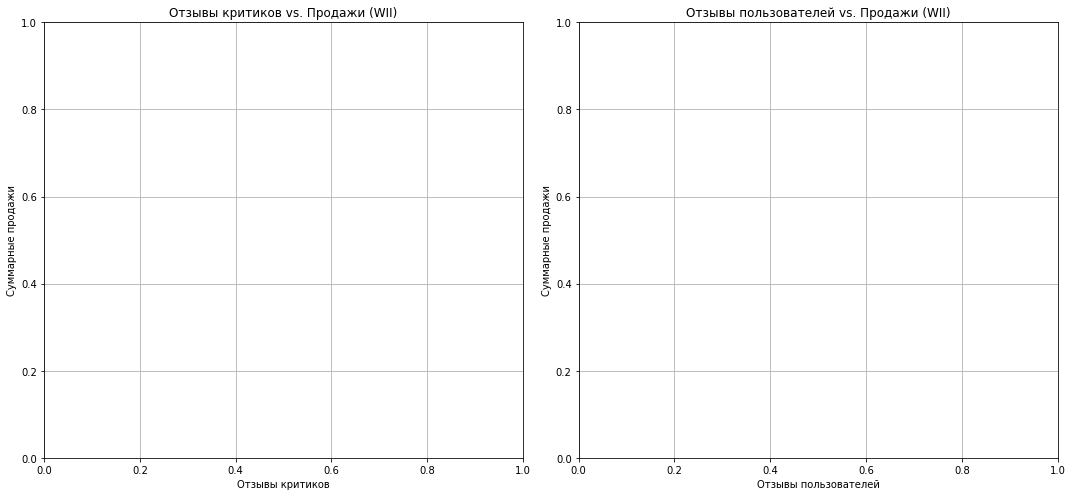

In [78]:
# Построим диаграммы рассеяния для отзывов пользователей и критиков
plt.figure(figsize=(15, 7))

# Отзывы критиков
plt.subplot(1, 2, 1)
sns.scatterplot(x='critic_score', y='total_sales', data=platform_wii_df)
plt.xlabel('Отзывы критиков')
plt.ylabel('Суммарные продажи')
plt.title('Отзывы критиков vs. Продажи (WII)')
plt.grid(True)

# Отзывы пользователей
plt.subplot(1, 2, 2)
sns.scatterplot(x='user_score', y='total_sales', data=platform_wii_df)
plt.xlabel('Отзывы пользователей')
plt.ylabel('Суммарные продажи')
plt.title('Отзывы пользователей vs. Продажи (WII)')
plt.grid(True)

plt.tight_layout()
plt.show();

In [79]:
# Вычислим корреляцию между отзывами и продажами
critic_correlation_wii = platform_wii_df['critic_score'].corr(platform_wii_df['total_sales'])
user_correlation_wii = platform_wii_df['user_score'].corr(platform_wii_df['total_sales'])

print(f'Корреляция между отзывами критиков и продажами (WII): {critic_correlation_wii:.2f}')
print(f'Корреляция между отзывами пользователей и продажами (WII): {user_correlation_wii:.2f}')

Корреляция между отзывами критиков и продажами (WII): nan
Корреляция между отзывами пользователей и продажами (WII): nan


*PS4*

In [80]:
# Отфильтруем данные для платформы PS4
platform_ps4_df = relevant_df[relevant_df['platform'] == 'PS4']

In [81]:
# Убираем заглушки из оценок критиков и пользователей
platform_ps4_df = platform_ps4_df[(platform_ps4_df['critic_score'] != -1) & (platform_ps4_df['user_score'] != -1)]

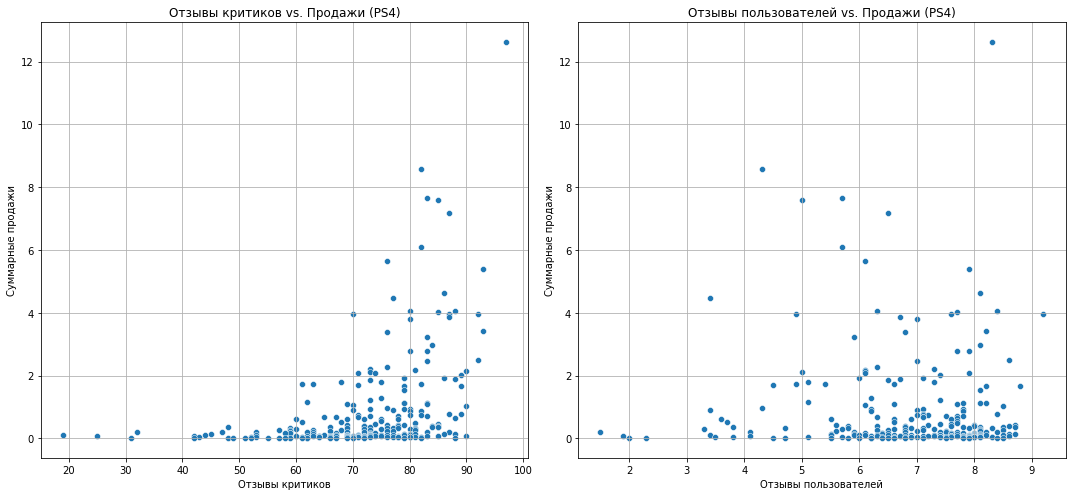

In [82]:
# Построим диаграммы рассеяния для отзывов пользователей и критиков
plt.figure(figsize=(15, 7))

# Отзывы критиков
plt.subplot(1, 2, 1)
sns.scatterplot(x='critic_score', y='total_sales', data=platform_ps4_df)
plt.xlabel('Отзывы критиков')
plt.ylabel('Суммарные продажи')
plt.title('Отзывы критиков vs. Продажи (PS4)')
plt.grid(True)

# Отзывы пользователей
plt.subplot(1, 2, 2)
sns.scatterplot(x='user_score', y='total_sales', data=platform_ps4_df)
plt.xlabel('Отзывы пользователей')
plt.ylabel('Суммарные продажи')
plt.title('Отзывы пользователей vs. Продажи (PS4)')
plt.grid(True)

plt.tight_layout()
plt.show();

In [83]:
# Вычислим корреляцию между отзывами и продажами
critic_correlation_ps4 = platform_ps4_df['critic_score'].corr(platform_ps4_df['total_sales'])
user_correlation_ps4 = platform_ps4_df['user_score'].corr(platform_ps4_df['total_sales'])

print(f'Корреляция между отзывами критиков и продажами (PS4): {critic_correlation_ps4:.2f}')
print(f'Корреляция между отзывами пользователей и продажами (PS4): {user_correlation_ps4:.2f}')

Корреляция между отзывами критиков и продажами (PS4): 0.40
Корреляция между отзывами пользователей и продажами (PS4): -0.04


**Вывод:**

- Для платформы PS3 корреляция между отзывами критиков и продажами составляет **0.45**, что указывает на умеренное положительное влияние оценок критиков на продажи. Корреляция между отзывами пользователей и продажами составляет **0.16**, что демонстрирует **слабую, но все же положительную связь**.


- Для платформы PS4 коэффициент корреляции между отзывами критиков и продажами составляет **0.40**, что также свидетельствует о положительном, но незначительном влиянии оценок критиков на продажи. Однако корреляция между отзывами пользователей и продажами оказалась отрицательной **-0.04**, что может указывать на **отсутствие значимой зависимости или даже небольшое обратное влияние**.

---

**3.9** Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

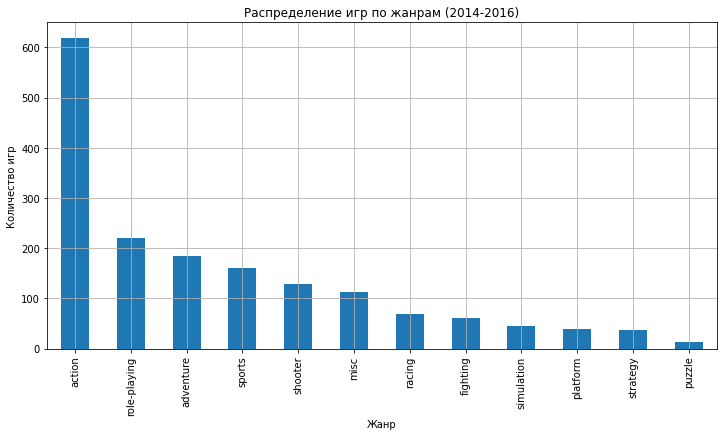

In [84]:
# Сгруппируем данные по жанрам и посчитаем количество игр в каждом жанре
genre_counts = relevant_df['genre'].value_counts()

# Построим график распределения игр по жанрам
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.xlabel('Жанр')
plt.ylabel('Количество игр')
plt.title('Распределение игр по жанрам (2014-2016)')
plt.grid(True)
plt.show()

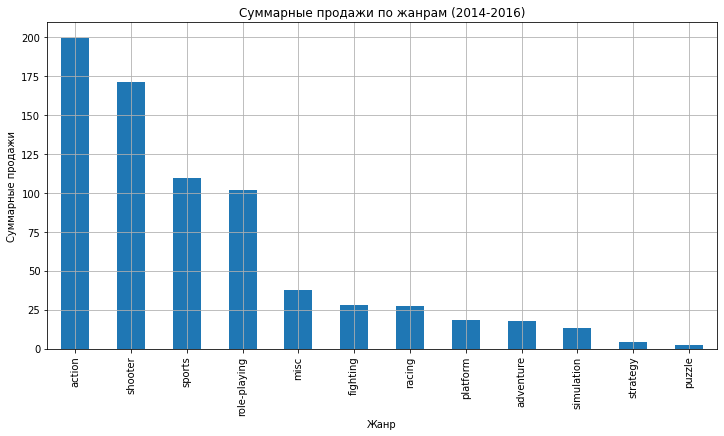

In [85]:
# Сгруппируем данные по жанрам и посчитаем суммарные продажи в каждом жанре
genre_sales = relevant_df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Построим график суммарных продаж по жанрам
plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar')
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи')
plt.title('Суммарные продажи по жанрам (2014-2016)')
plt.grid(True)
plt.show()

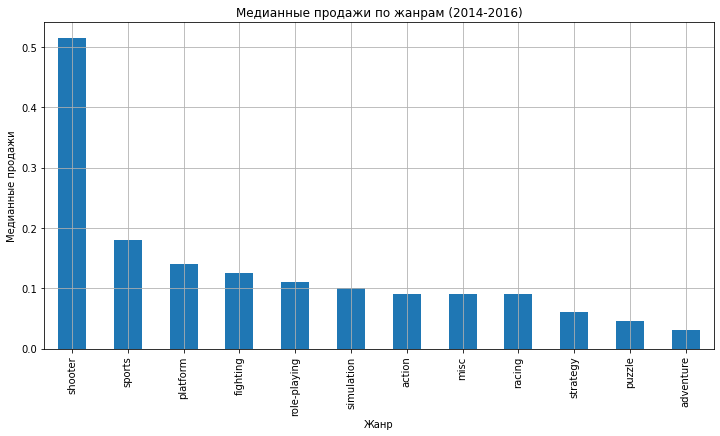

In [86]:
median_sales = relevant_df.groupby('genre')['total_sales'].median().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
median_sales.plot(kind='bar')
plt.xlabel('Жанр')
plt.ylabel('Медианные продажи')
plt.title('Медианные продажи по жанрам (2014-2016)')
plt.grid(True)
plt.show()

**Вывод:**

- Такие жанры, как Action, Sports и Shooter, являются одними из самых прибыльных;


- Жанры, такие как Puzzle, Adventure и Strategy, имеют более низкие продажи по сравнению с другими жанрами.

---

**ВЫВОД:**

- Анализ данных по индустрии видеоигр показывает, что ключевой период роста выпускаемых игр приходится на 1990-2008 годы, с пиком в 1432 игры. После 2008 года начинается спад выпускаемых игр, что свидетельствует о насыщении рынка или изменении потребительских предпочтений.


- Продажи по платформам также значительно менялись по годам, и для долгосрочного анализа важны данные за все периоды. Топ-6 платформ с наибольшими суммарными продажами показали, что платформы обычно активны в течение 11 лет.


- Актуальный период для анализа был определен с 2009 по 2016 годы, и он был использован для построения прогноза на 2017 год. Были выявлены платформы с наибольшими суммарными продажами, платформы, продажи которых растут, а также платформы с падающими продажами.


- Анализ графика «ящик с усами» показал, что платформы с более высокими медианными значениями и меньшим разбросом данных более стабильны и прибыльны. 


- Отзывы критиков оказывают значительное влияние на продажи игр, особенно для платформы X360, где коэффициент корреляции составляет 0.31. Отзывы пользователей также влияют на продажи, но в меньшей степени. Эти тенденции наблюдаются на всех анализируемых платформах, таких как PS3, Wii и PS4, хотя влияние отзывов критиков остается более выраженным.


- При анализе жанров игр было выявлено, что самые прибыльные жанры включают Action, Sports и Shooter, в то время как жанры Puzzle, Adventure и Strategy имеют более низкие продажи.

---

**Шаг 4.** Портрет пользователя каждого региона

In [87]:
# Разделим данные по регионам
na_df = relevant_df[['platform', 'genre', 'na_sales', 'rating']]
eu_df = relevant_df[['platform', 'genre', 'eu_sales', 'rating']]
jp_df = relevant_df[['platform', 'genre', 'jp_sales', 'rating']]

**4.1** Самые популярные платформы (топ-5) для пользователя каждого региона (NA, EU, JP)

In [90]:
# Рассчитаем общие продажи по всем платформам для каждого региона
total_na_sales = na_df['na_sales'].sum()
total_eu_sales = eu_df['eu_sales'].sum()
total_jp_sales = jp_df['jp_sales'].sum()

In [91]:
# Выделим топ-5 платформ и рассчитаем их доли продаж
top_5_na_platforms = na_df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
top_5_na_share = top_5_na_platforms / total_na_sales
top_5_na_share['Other'] = 1 - top_5_na_share.sum()

top_5_eu_platforms = eu_df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_5_eu_share = top_5_eu_platforms / total_eu_sales
top_5_eu_share['Other'] = 1 - top_5_eu_share.sum()

top_5_jp_platforms = jp_df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
top_5_jp_share = top_5_jp_platforms / total_jp_sales
top_5_jp_share['Other'] = 1 - top_5_jp_share.sum()

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


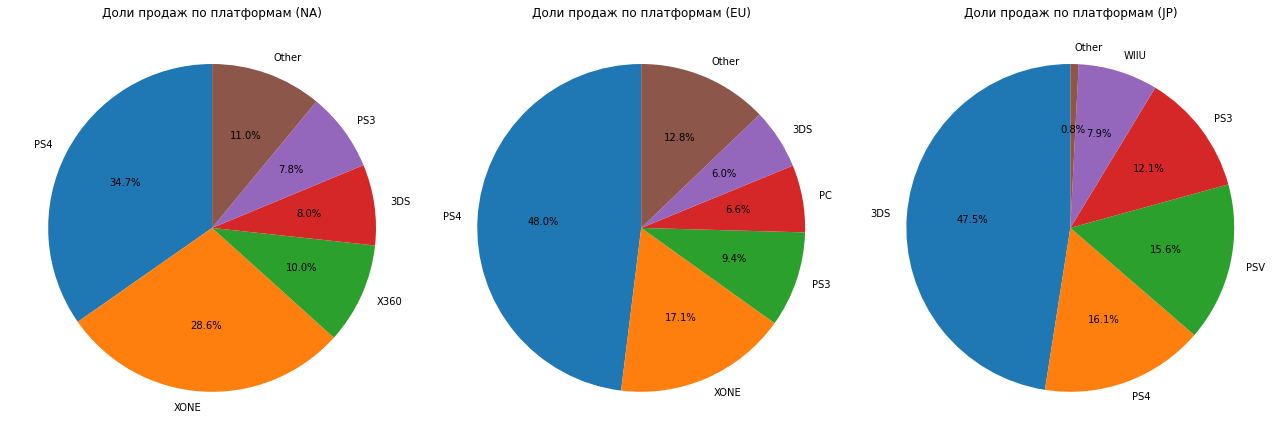

In [92]:
# Построим круговые диаграммы
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
top_5_na_share.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Доли продаж по платформам (NA)')
plt.ylabel('')

plt.subplot(1, 3, 2)
top_5_eu_share.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Доли продаж по платформам (EU)')
plt.ylabel('')

plt.subplot(1, 3, 3)
top_5_jp_share.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Доли продаж по платформам (JP)')
plt.ylabel('')

plt.tight_layout()
plt.show()

- В Северной Америке больше 60% берут на себя консоли XONE и PS4, а в Европе почти половина только за PS4.

- В Японии почти половина всех продаж за платформой 3DS.


---

**4.2** Самые популярные жанры (топ-5) для пользователя каждого региона (NA, EU, JP)

In [93]:
# Определим топ-5 жанров для каждого региона
top_5_na_genres = na_df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top_5_eu_genres = eu_df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_5_jp_genres = jp_df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

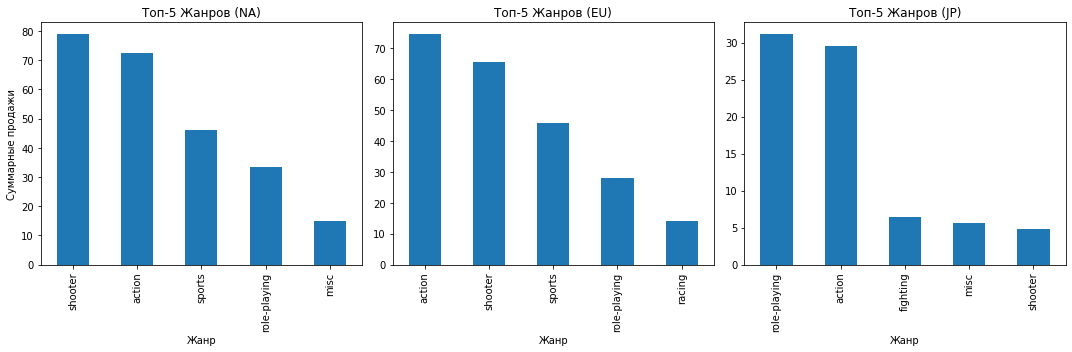

In [94]:
# Построим графики долей продаж для жанров
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
top_5_na_genres.plot(kind='bar')
plt.title('Топ-5 Жанров (NA)')
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи')

plt.subplot(1, 3, 2)
top_5_eu_genres.plot(kind='bar')
plt.title('Топ-5 Жанров (EU)')
plt.xlabel('Жанр')

plt.subplot(1, 3, 3)
top_5_jp_genres.plot(kind='bar')
plt.title('Топ-5 Жанров (JP)')
plt.xlabel('Жанр')

plt.tight_layout()
plt.show()

**Вывод:** Поясните разницу.

Различия в жанрах показывают, что в Северной Америке и Европе предпочитаеют экшен-игры и шутеры, тогда как в Японии жанр Role-playing значительно преобладает, но и экшн-игры там тоже пользуются популярностью.

---

**4.3** Влияет ли рейтинг ESRB на продажи в отдельном регионе?

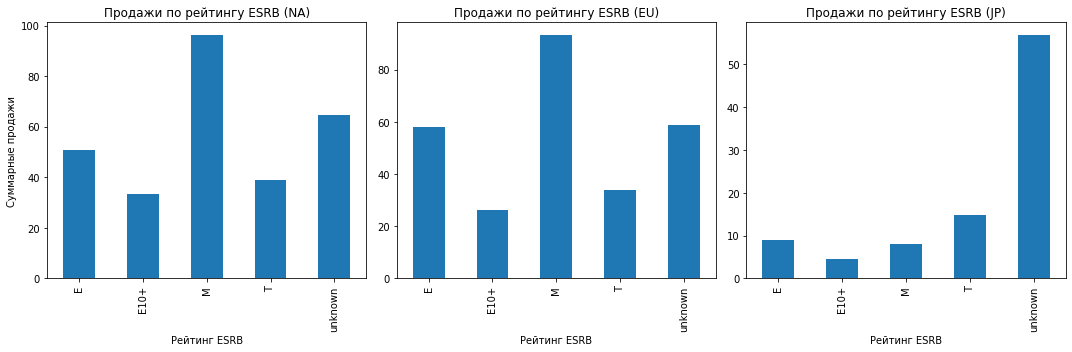

In [95]:
# Анализ влияния рейтинга ESRB на продажи
esrb_na_sales = na_df.groupby('rating')['na_sales'].sum()
esrb_eu_sales = eu_df.groupby('rating')['eu_sales'].sum()
esrb_jp_sales = jp_df.groupby('rating')['jp_sales'].sum()

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
esrb_na_sales.plot(kind='bar')
plt.title('Продажи по рейтингу ESRB (NA)')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Суммарные продажи')

plt.subplot(1, 3, 2)
esrb_eu_sales.plot(kind='bar')
plt.title('Продажи по рейтингу ESRB (EU)')
plt.xlabel('Рейтинг ESRB')

plt.subplot(1, 3, 3)
esrb_jp_sales.plot(kind='bar')
plt.title('Продажи по рейтингу ESRB (JP)')
plt.xlabel('Рейтинг ESRB')

plt.tight_layout()
plt.show()

**Вывод:**

- В Северной Америке игры с рейтингом "М"  имеет наибольшие продажи. Рейтинг "Е" также показывает неплохие продажи. Большое количество продаж с неизвестным рейтингом.


- В Европе игры с рейтингом "М" лидируют по продажам, за ними следуют игры с рейтингами "Е". Игры с неопределенным рейтингом "unknown" также показывают высокие продажи.


- В Японии наибольшие продажи имеют игры с неопределенным рейтингом "unknown", скорее всего из-за того, что в этой стране существует альтернативная система рейтинга.

**ВЫВОД:**

1. Платформы:

- В Северной Америке больше 60% берут на себя консоли XONE и PS4, а в Европе почти половина за PS4.

- В Японии почти половина всех продаж за платформой 3DS.

2. Жанры:

- Различия в жанрах показывают, что в Северной Америке и Европе предпочитаеют экшен-игры и шутеры, тогда как в Японии жанр Role-playing значительно преобладает, но и экшн-игры там тоже пользуются популярностью.

3. Рейтинги ESRB:

- В Северной Америке игры с рейтингом "М" имеет наибольшие продажи. Рейтинг "Е" также показывает неплохие продажи. Большое количество продаж с неизвестным рейтингом.
- В Европе игры с рейтингом "М" лидируют по продажам, за ними следуют игры с рейтингами "Е". Рейтинг "M" также показывает высокие продажи.
- В Японии наибольшие продажи имеют игры с неопределенным рейтингом "0", скорее всего из-за того, что в этой стране существует альтернативная система рейтинга.

---

**Шаг 5.** Проверка гипотезы

1. *Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;*

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H1: Средние пользовательские рейтинги платформ Xbox One и PC разные.

*Задайте самостоятельно пороговое значение alpha.*

- Мы используем пороговое значение alpha = 0.05. Это означает, что мы принимаем 5% вероятность того, что наш вывод будет ошибочным.

In [96]:
xbox_one_raitings = relevant_df[relevant_df['platform'] == 'XONE']['user_score'].dropna()
pc_raitings = relevant_df[relevant_df['platform'] == 'PC']['user_score'].dropna()

In [97]:
t_stat_1 = st.ttest_ind(xbox_one_raitings, pc_raitings, equal_var=False)

alpha = 0.05

p_value_1 = t_stat_1.pvalue
print(f'Гипотеза1. p_значение: {p_value_1}')
if p_value_1 < alpha:
    print('Отклоняем нулевую гипотезу')
else:
    print('Не можем отклонить нулевую гипотезу')

Гипотеза1. p_значение: 0.26246011727057744
Не можем отклонить нулевую гипотезу


Вывод: отклонить нулевую гипотезу не можем. Это означает, что средние пользовательские рейтинги платформ Xbox One и PC могут быть идентичны.

2. *Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.*

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

H1: Средние пользовательские рейтинги жанров Action и Sports разные.

*Задайте самостоятельно пороговое значение alpha.*

- Мы используем пороговое значение alpha = 0.05. Это означает, что мы принимаем 5% вероятность того, что наш вывод будет ошибочным.

In [98]:
action_ratings = relevant_df[relevant_df['genre'] == 'action']['user_score'].dropna()
sports_ratings = relevant_df[relevant_df['genre'] == 'sports']['user_score'].dropna()

In [99]:
t_stat_2 = st.ttest_ind(action_ratings, sports_ratings, equal_var=False)

alpha = 0.05

p_value_2 = t_stat_2.pvalue

print(f'Гипотеза1. p_значение: {p_value_2}')
if p_value_2 < alpha:
    print('Отклоняем нулевую гипотезу')
else:
    print('Не можем отклонить нулевую гипотезу')

Гипотеза1. p_значение: 4.829371809684136e-05
Отклоняем нулевую гипотезу


Вывод: нулевая гипотеза отклоняется. Это означает, что средние пользовательские рейтинги жанров Action и Sports статистически значимо различаются.

**Вывод:**

1. Гипотеза:

- Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC разные.


2. Гипотеза:

- Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
- Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.

Критерии для проверки гипотез:

- Используется t-критерий Стьюдента для двух независимых выборок, поскольку он подходит для сравнения средних значений двух независимых групп. Этот метод широко используется и признан в статистическом анализе.

- Выбрано пороговое значение alpha = 0.05, что означает, что мы принимаем 5% вероятность того, что наш вывод будет ошибочным.

**Шаг 6.** Общий вывод

**1. Изучение общей информации:**
В ходе анализа данных было выявлено, что в некоторых столбцах не соответствующий тип данных, названия столбцов не приведены к одному стилю, а также обнаружены пропуски в данных. Дубликаты в данных отсутствуют.

**2. Подготовка данных:**
Для обеспечения целостности и унифицированности данных были выполнены следующие шаги:
- Названия столбцов приведены к единому стилю – нижнему регистру.
- Содержимое столбцов 'rating' и 'platform' приведено к верхнему регистру, а 'name' и 'genre' – к нижнему.
- Пропущенные значения в столбцах 'name' и 'genre' удалены.
- Пустые значения в столбце 'year_of_release' сгруппированы по названию и заменены на медианные значения групп.
- Пропущенные значения в столбцах 'critic_score' и 'user_score' заменены на '-1', а в 'rating' – на 'unknown'.
- Столбцы 'year_of_release' и 'critic_score' приведены к целочисленному типу данных.
- Столбец 'user_score' приведен к числовому типу данных с плавающей точкой.

**3. Анализ данных по индустрии видеоигр:**
Анализ показал, что ключевой период роста выпускаемых игр приходится на 1990-2008 годы, после чего наблюдается спад. Продажи по платформам менялись по годам, с активностью платформ в течение примерно 11 лет. Анализ актуального периода (2009-2016 годы) помог определить платформы с растущими и падающими продажами. Отзывы критиков оказывают значительное влияние на продажи игр, особенно для платформы X360. Самыми прибыльными жанрами являются Action, Sports и Shooter, тогда как Puzzle, Adventure и Strategy имеют более низкие продажи.

**4. Портрет пользователя каждого региона:**
- **Платформы:** В Северной Америке больше 60% берут на себя консоли XONE и PS4, а в Европе почти половина за PS4.
В Японии почти половина всех продаж за платформой 3DS.
- **Жанры:** Различия в жанрах показывают, что в Северной Америке и Европе предпочитаеют экшен-игры и шутеры, тогда как в Японии жанр Role-playing значительно преобладает, но и экшн-игры там тоже пользуются популярностью.
-  **Рейтинги ESRB:** В Северной Америке игры с рейтингом "М" имеет наибольшие продажи. Рейтинг "Е" также показывает неплохие продажи. Большое количество продаж с неизвестным рейтингом.
В Европе игры с рейтингом "М" лидируют по продажам, за ними следуют игры с рейтингами "Е". Игры с неопределенным рейтингом "unknown" также показывают высокие продажи.
В Японии наибольшие продажи имеют игры с неопределенным рейтингом "unknown", скорее всего из-за того, что в этой стране существует альтернативная система рейтинга.


**5. Проверка гипотез:**
- Гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC не была отклонена, что свидетельствует об отстутсвтии значимых различий между их рейтингами.
- Гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports также была отклонена, указывая на значимые различия между их рейтингами.

Критерии для проверки гипотез включали использование t-критерия Стьюдента для двух независимых выборок с пороговым значением alpha = 0.05.

Общий анализ данных и проверка гипотез позволили выявить ключевые тенденции и зависимости в индустрии видеоигр, что может помочь разработчикам игр и маркетологам лучше понимать потребности и предпочтения пользователей в разных регионах, а также оптимизировать свои стратегии продвижения и разработки продуктов.

**Рекомендации:**

Фокусироваться на популярные платформы и жанры в каждом регионе, учитывая возрастные рейтинги и анализ отзывов критиков и пользователей:

1. Платформы:
- NA: Приоритет XboxONE и PS2
- EU: Приоритет XboxONE и PS2,3
- JP: Приоритет PS и DS

2. Жанры:
- NA, EU: Приоритет экшен-игры и шутеры
- JP: Приоритет Role-playing, экшн-игры

3. Рейтинги ESRB:
- NA, EU: Приоритет "М", "Е"